## Import Libraries

In [82]:
# Import necessary libraries
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt


## Constants and Paths

In [83]:
# Define constants and paths
im_shape = (250, 250)
TRAINING_DIR = r'D:\Deep Learning\Text_Image_Language_Classifier\Text Image Dataset\train'
TEST_DIR = r'D:\Deep Learning\Text_Image_Language_Classifier\Text Image Dataset\train'
seed = 10
BATCH_SIZE = 64
epochs = 100

## Load the data generators

In [84]:
data_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
    class_mode='categorical', batch_size=BATCH_SIZE, subset="training"
)

validation_generator = val_data_generator.flow_from_directory(
    TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
    class_mode='categorical', batch_size=BATCH_SIZE, subset="validation"
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
    class_mode='categorical', batch_size=BATCH_SIZE
)
global num_classes, nb_train_samples, nb_validation_samples, nb_test_samples, classes

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes = len(classes)

Found 10340 images belonging to 12 classes.

Found 2580 images belonging to 12 classes.

Found 3452 images belonging to 12 classes.

Classes: ['Assamese', 'Brahmi', 'Devanagari', 'Gujarati', 'Kannada', 'Malayalam', 'Modi', 'Odia', 'Punjabi', 'Tamil', 'Telugu', 'Urdu']


## Define the CNN mmodel

In [85]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(im_shape[0], im_shape[1], 3))
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Compile and Train the model

In [86]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
]

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // BATCH_SIZE,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=nb_validation_samples // BATCH_SIZE
)


Epoch 1/100


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x512xi1>'

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x512xi1>'


 81/161 [==============>...............] - ETA: 1:53 - loss: 1.1143 - accuracy: 0.6358

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x36x1x512xi1>'

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0783246a-4091-11ee-8fca-aead88ae2785/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x36x1x512xi1>'


161/161 [==============================] - ETA: 0s - loss: 0.8925 - accuracy: 0.7032

Epoch 1: val_accuracy improved from -inf to 0.34180, saving model to best_model.h5

161/161 [==============================] - 512s 3s/step - loss: 0.8925 - accuracy: 0.7032 - val_loss: 6438.9395 - val_accuracy: 0.3418

Epoch 2/100

161/161 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.8210

Epoch 2: val_accuracy did not improve from 0.34180

161/161 [==============================] - 222s 1s/step - loss: 0.5622 - accuracy: 0.8210 - val_loss: 4.4189 - val_accuracy: 0.0945

Epoch 3/100

161/161 [==============================] - ETA: 0s - loss: 0.3679 - accuracy: 0.8719

Epoch 3: val_accuracy did not improve from 0.34180

161/161 [==============================] - 221s 1s/step - loss: 0.3679 - accuracy: 0.8719 - val_loss: 5.2460 - val_accuracy: 0.0957

Epoch 4/100

161/161 [==============================] - ETA: 0s - loss: 0.2719 - accuracy: 0.9072

Epoch 4: val_accuracy did n

## Visualize Training Curves

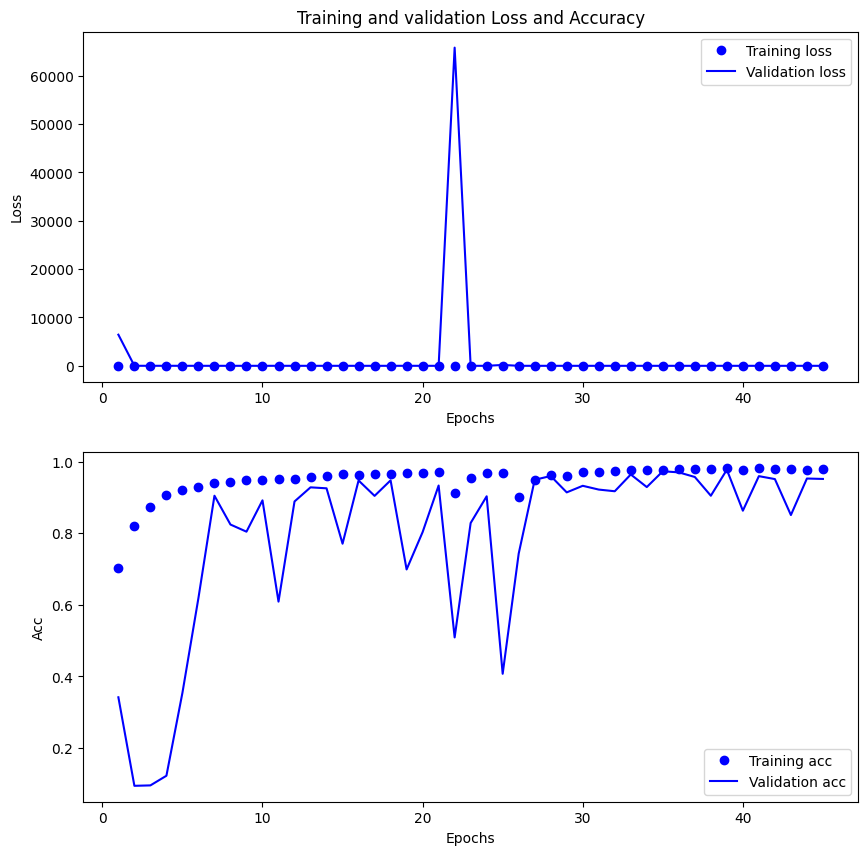

In [87]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Evaluate the model on validation and test sets

In [89]:
best_model = keras.models.load_model('best_model.h5')
score_val = best_model.evaluate(validation_generator)
score_test = best_model.evaluate(test_generator)

41/41 [==============================] - 132s 2s/step - loss: 0.0836 - accuracy: 0.9771

54/54 [==============================] - 81s 2s/step - loss: 2.3853 - accuracy: 0.7711


In [90]:
print('Validation loss:', score_val[0])
print(f'\nValidation accuracy:{round(score_val[1]*100,2)}%')

print('\nTest loss:', score_test[0])
print(f'\nTest accuracy:{round(score_test[1]*100,2)}%')

Validation loss: 0.08362273871898651



Validation accuracy:97.71%



Test loss: 2.3853275775909424



Test accuracy:77.11%


## Plotting Test Images with Prediction

2/2 [==============================] - 33s 3s/step


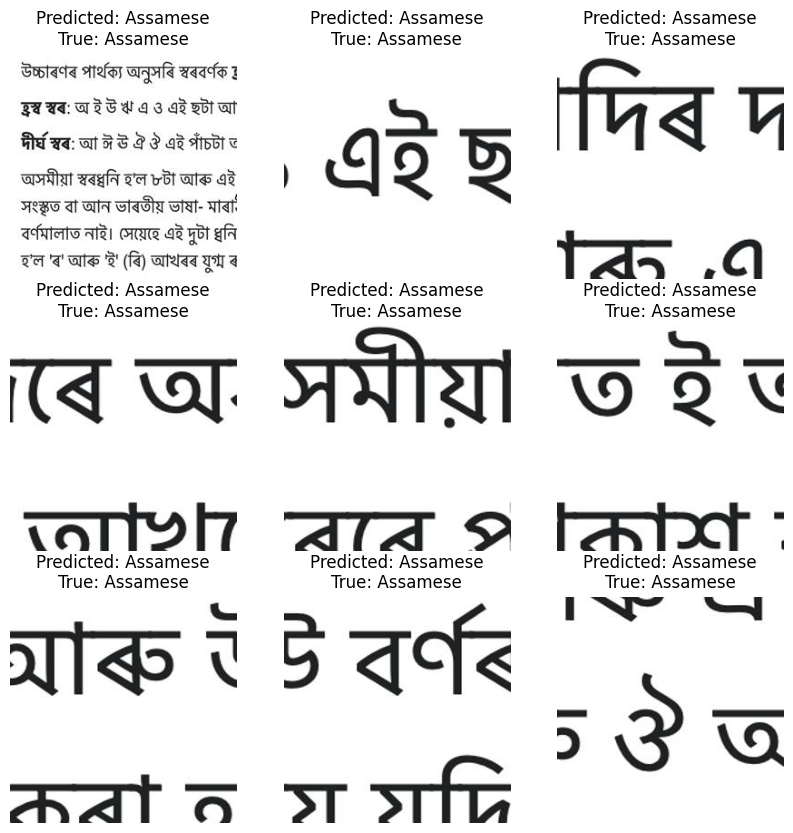

In [91]:
def plot_test_images_with_predictions(model, test_generator, num_images=9):
    test_images, true_labels = test_generator.next()
    predictions = model.predict(test_images)
    predicted_labels = [classes[np.argmax(pred)] for pred in predictions]

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(test_images[i])
        plt.title(f'Predicted: {predicted_labels[i]}\nTrue: {classes[np.argmax(true_labels[i])]}')
        plt.axis('off')

    plt.show()

# Plot test images with predictions
plot_test_images_with_predictions(best_model, test_generator, num_images=9)


In [92]:
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

54/54 [==============================] - 88s 1s/step


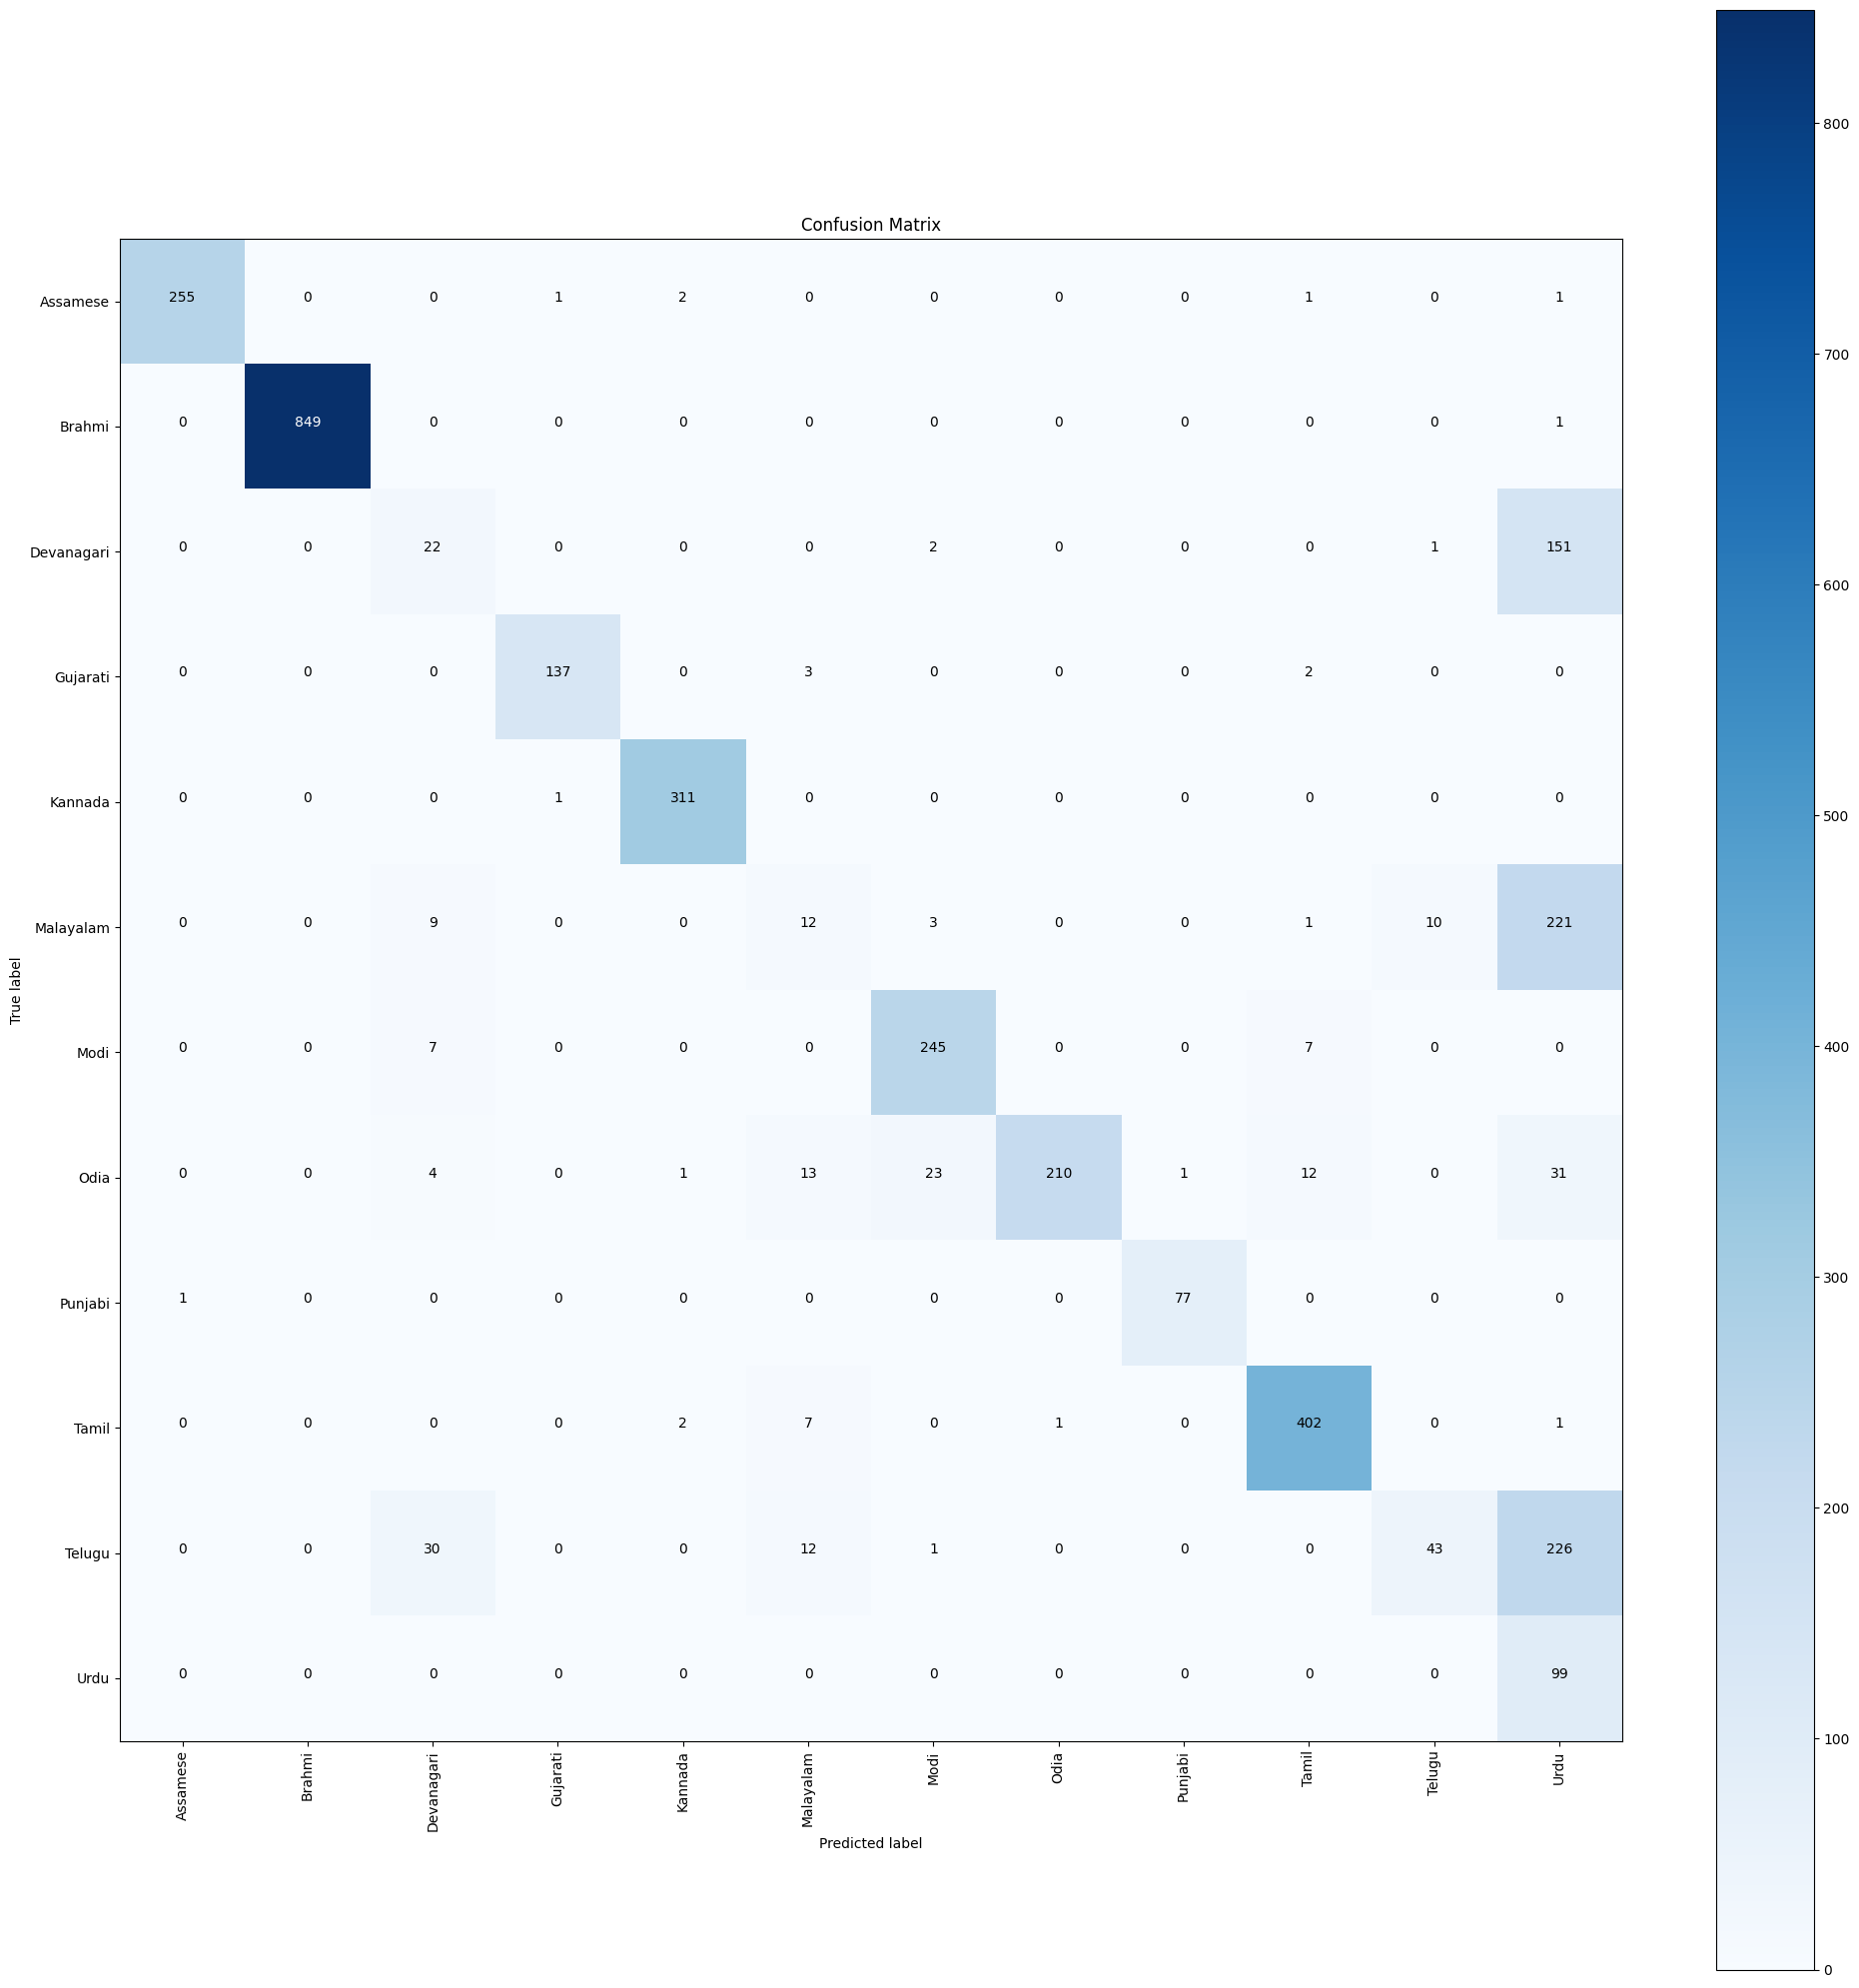

In [93]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')



In [94]:
#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report

              precision    recall  f1-score   support



    Assamese       1.00      0.98      0.99       260

      Brahmi       1.00      1.00      1.00       850

  Devanagari       0.31      0.12      0.18       176

    Gujarati       0.99      0.96      0.98       142

     Kannada       0.98      1.00      0.99       312

   Malayalam       0.26      0.05      0.08       256

        Modi       0.89      0.95      0.92       259

        Odia       1.00      0.71      0.83       295

     Punjabi       0.99      0.99      0.99        78

       Tamil       0.95      0.97      0.96       413

      Telugu       0.80      0.14      0.23       312

        Urdu       0.14      1.00      0.24        99



    accuracy                           0.77      3452

   macro avg       0.77      0.74      0.70      3452

weighted avg       0.85      0.77      0.77      3452




## Inference

1/1 [==============================] - 30s 30s/step


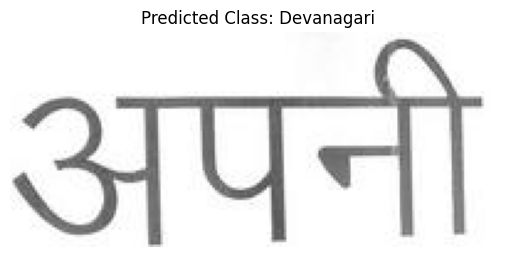

In [98]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the pre-trained model
model = load_model('best_model.h5')

# Function to preprocess the input image
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(250, 250))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Function to predict the class of the object in the image
def predict_class(img_path, model):
    preprocessed_img = preprocess_input_image(img_path)
    predictions = model.predict(preprocessed_img)
    class_index = np.argmax(predictions)
    return class_index

# Provide the path to your input image
input_image_path = 'test1.jpg'

# Predict the class of the object in the image
predicted_class_index = predict_class(input_image_path, model)

class_labels =list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and predicted class
img = image.load_img(input_image_path)
plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class_label)
plt.show()



1/1 [==============================] - 1s 1s/step


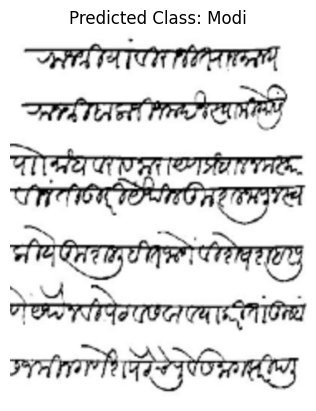

In [99]:
input_image_path = 'test1.png'

# Predict the class of the object in the image
predicted_class_index = predict_class(input_image_path, model)
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and predicted class
img = image.load_img(input_image_path)
plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class_label)
plt.show()



1/1 [==============================] - 0s 72ms/step


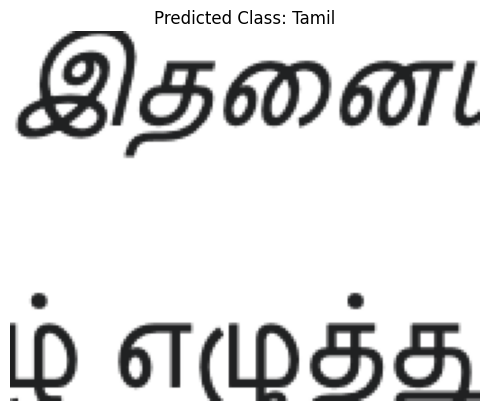

In [106]:
input_image_path = 'test2.png'

# Predict the class of the object in the image
predicted_class_index = predict_class(input_image_path, model)
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and predicted class
img = image.load_img(input_image_path)
plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class_label)
plt.show()



1/1 [==============================] - 1s 1s/step


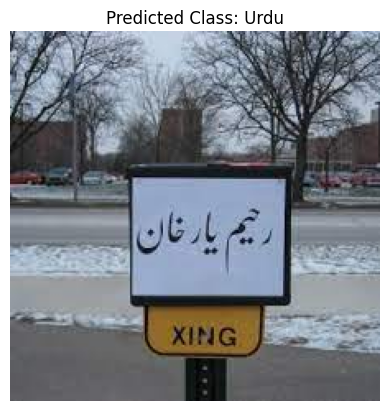

In [107]:
input_image_path = 'test3.jpeg'

# Predict the class of the object in the image
predicted_class_index = predict_class(input_image_path, model)
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and predicted class
img = image.load_img(input_image_path)
plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: ' + predicted_class_label)
plt.show()

